In [2]:
import numpy as np
from data_preprocess import *
from utils import *

In [3]:
%load_ext autoreload
%autoreload 2

data_dict = load_data()
X_test = data_dict['X_test']
y_test = data_dict['y_test']
X_train_valid = data_dict['X_train_valid']
y_train_valid = data_dict['y_train_valid']
person_train_valid = data_dict['person_train_valid'].flatten()
person_test = data_dict['person_test'].flatten()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
## Split train data into each class for analysis

In [5]:
y_train_convert = y_train_valid - 769
data_class = {}
for data, label in zip(X_train_valid, y_train_convert):
    if data_class.get(label) is None:
        data_class[label] = np.array([data])
    else:
        data_class[label] = np.append(data_class[label], [data], axis=0)

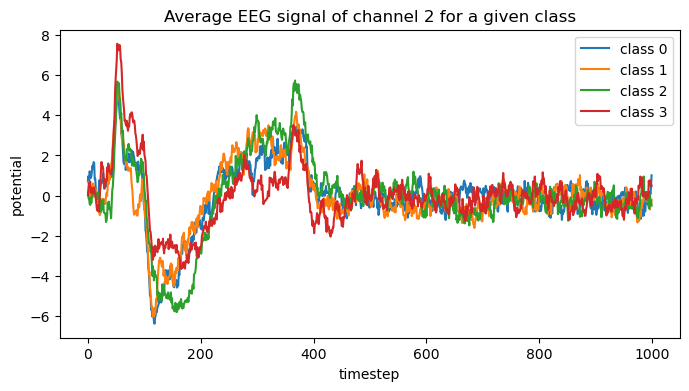

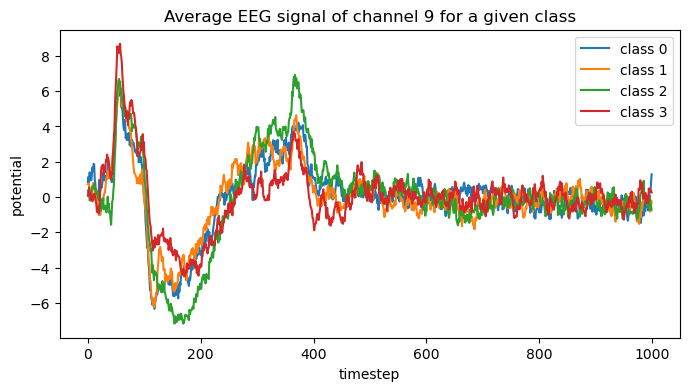

In [6]:
plot_channel_perclass(data_class, [2, 9]) # you can try other channels, pretty much all channels are the same

In [7]:
aug_data = load_prep_data(time=500, debug=True, onehot=True)
save_path = get_save_path()
ensure_dir(save_path)
save_data_pickle(aug_data, save_path)

Shape of x_train set: (6960, 22, 250)
Shape of y_train labels: (6960,)
Shape of x_valid set: (1500, 22, 250)
Shape of y_valid labels: (1500,)
Shape of X_test_prep set: (1772, 22, 250)
Shape of y_test_prep labels: (1772,)
Shape of y_train labels after categorical conversion: (6960, 4)
Shape of y_valid labels after categorical conversion: (1500, 4)
Shape of y_test labels after categorical conversion: (1772, 4)
Saving data pickle...
Data pickle Saved.
